# 📊 Bitcoin Price Analysis with Python & Plotly

Welcome!  
In this project, we explore historical Bitcoin data:
- Load data from Yahoo Finance
- Visualize daily closing price & candlestick chart
- Calculate daily returns & plot histogram
- Compute and plot 50-day simple moving average (SMA)

This notebook shows how to combine Python, Pandas, Matplotlib, and Plotly to explore financial data.

---

## 📦 Install & Import Libraries


In [4]:
!pip install yfinance plotly

import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import yfinance as yf


## 📥 Load Bitcoin Daily Price Data

We'll automatically download daily data from Yahoo Finance (2019–2024).


In [5]:
# Download Bitcoin data
bitcoin_data = yf.download('BTC-USD', start='2019-01-01', end='2024-12-31')

# Show first few rows
bitcoin_data.head()


/tmp/ipython-input-5-518506645.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bitcoin_data = yf.download('BTC-USD', start='2019-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2019-01-01,3843.520020,3850.913818,3707.231201,3746.713379,4324200990
2019-01-02,3943.409424,3947.981201,3817.409424,3849.216309,5244856836
2019-01-03,3836.741211,3935.685059,3826.222900,3931.048584,4530215219
2019-01-04,3857.717529,3865.934570,3783.853760,3832.040039,4847965467
2019-01-05,3845.194580,3904.903076,3836.900146,3851.973877,5137609824


## 📈 Plot Daily Close Price


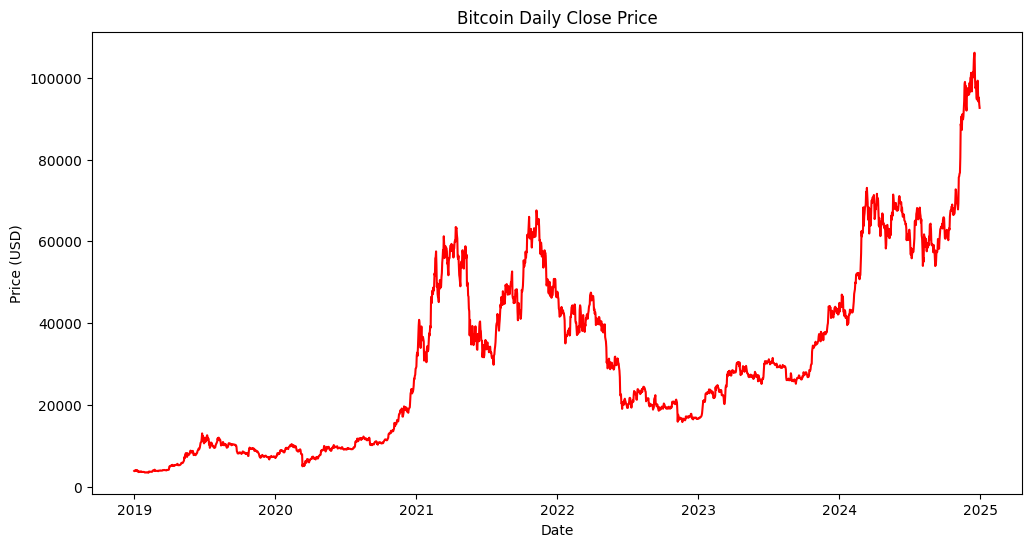

In [6]:
plt.figure(figsize=(12,6))
plt.plot(bitcoin_data['Close'], color='red')
plt.title("Bitcoin Daily Close Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


## 🕯 Plot Candlestick Chart
Candlestick charts help visualize open, high, low, and close prices.


In [9]:
# Check the first few rows
print(bitcoin_data.head())

# Check for missing data
print(bitcoin_data.isnull().sum())


Price             Close         High          Low         Open       Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095
Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64


In [10]:
import yfinance as yf

# Try a different recent range & fresh data
bitcoin_data = yf.download('BTC-USD', start='2021-01-01', end='2023-12-31')

# Drop missing data just in case
bitcoin_data.dropna(inplace=True)

# Show first few rows to confirm
bitcoin_data.head()


/tmp/ipython-input-10-3104680880.py:4: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2021-01-01,29374.152344,29600.626953,28803.585938,28994.009766,40730301359
2021-01-02,32127.267578,33155.117188,29091.181641,29376.455078,67865420765
2021-01-03,32782.023438,34608.558594,32052.316406,32129.408203,78665235202
2021-01-04,31971.914062,33440.218750,28722.755859,32810.949219,81163475344
2021-01-05,33992.429688,34437.589844,30221.187500,31977.041016,67547324782


In [14]:
import yfinance as yf
import plotly.graph_objects as go
import pandas as pd

# Download fresh Bitcoin data
bitcoin_data = yf.download('BTC-USD', start='2021-01-01', end='2023-12-31')

# ✅ Flatten the multi-index columns if needed
if isinstance(bitcoin_data.columns, pd.MultiIndex):
    bitcoin_data.columns = bitcoin_data.columns.get_level_values(0)

# ✅ Reset index to get 'Date' column
bitcoin_data_reset = bitcoin_data.reset_index()

# 🕯 Plot candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=bitcoin_data_reset['Date'],
    open=bitcoin_data_reset['Open'],
    high=bitcoin_data_reset['High'],
    low=bitcoin_data_reset['Low'],
    close=bitcoin_data_reset['Close']
)])

fig.update_layout(title='Bitcoin Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price (USD)',
                  xaxis_rangeslider_visible=False)

fig.show()


/tmp/ipython-input-14-2913729563.py:6: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


## 📊 Calculate Daily Returns & Plot Histogram
Daily returns show how much the price changes each day.


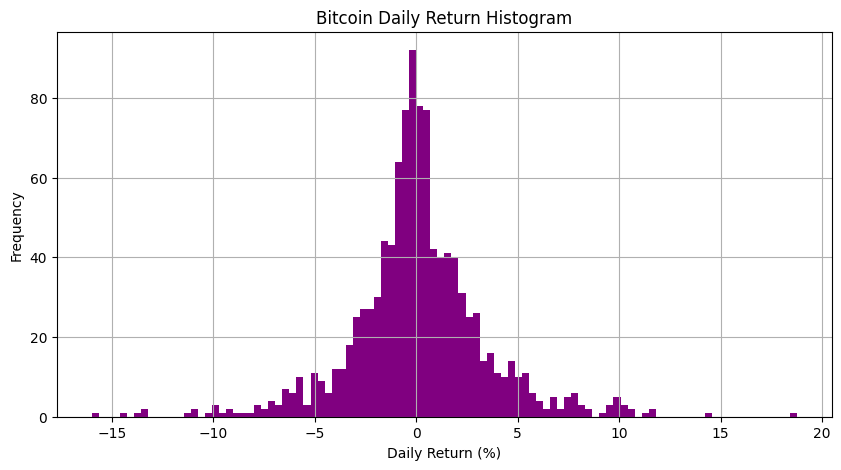

In [15]:
# Calculate daily returns as percentage
bitcoin_data['daily_return'] = bitcoin_data['Close'].pct_change() * 100

# Plot histogram
plt.figure(figsize=(10,5))
bitcoin_data['daily_return'].hist(bins=100, color='purple')
plt.title('Bitcoin Daily Return Histogram')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()


## 📐 Calculate & Plot 50-day Simple Moving Average (SMA)
SMA helps smooth out price trends over time.


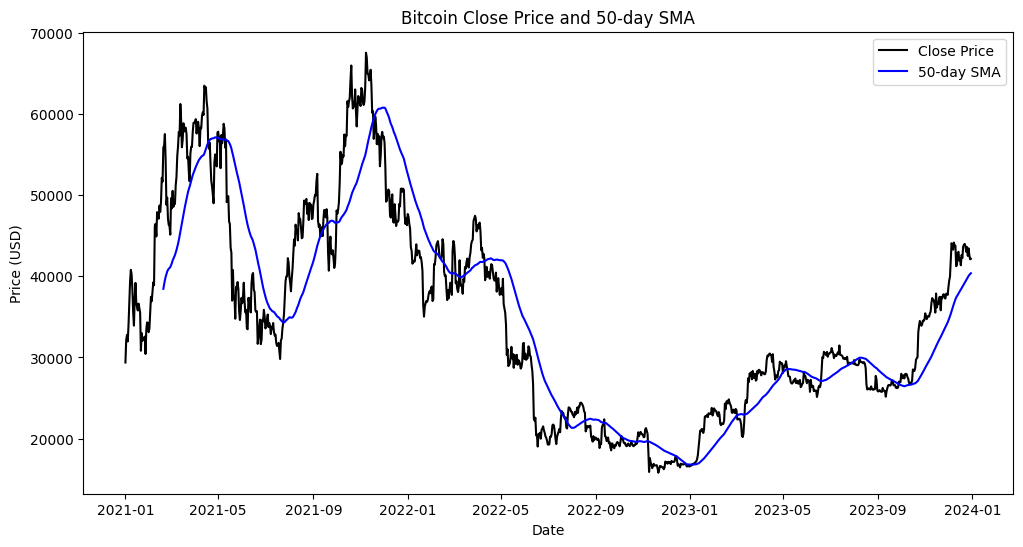

In [16]:
bitcoin_data['SMA_50'] = bitcoin_data['Close'].rolling(window=50).mean()

plt.figure(figsize=(12,6))
plt.plot(bitcoin_data['Close'], color='black', label='Close Price')
plt.plot(bitcoin_data['SMA_50'], color='blue', label='50-day SMA')
plt.title('Bitcoin Close Price and 50-day SMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()




**Next ideas:**
- Try longer SMA (e.g., 200-day)
- Forecast future prices (time series models)
- Analyze correlations with other cryptocurrencies



In [2]:
!pip install yfinance plotly
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import yfinance as yf

# Download Bitcoin data
bitcoin_data = yf.download('BTC-USD', start='2020-01-01', end='2023-12-31')

# Fix multi-index columns if needed
if isinstance(bitcoin_data.columns, pd.MultiIndex):
    bitcoin_data.columns = bitcoin_data.columns.get_level_values(0)

# Reset index for plotting later
bitcoin_data_reset = bitcoin_data.reset_index()

# Show first few rows
bitcoin_data.head()


/tmp/ipython-input-2-572107946.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bitcoin_data = yf.download('BTC-USD', start='2020-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


## 📊 Add 200-day Simple Moving Average (SMA)

A Simple Moving Average (SMA) smooths out price data to show the long-term trend.
We calculate the 200-day SMA to see how Bitcoin price moves relative to its longer trend.


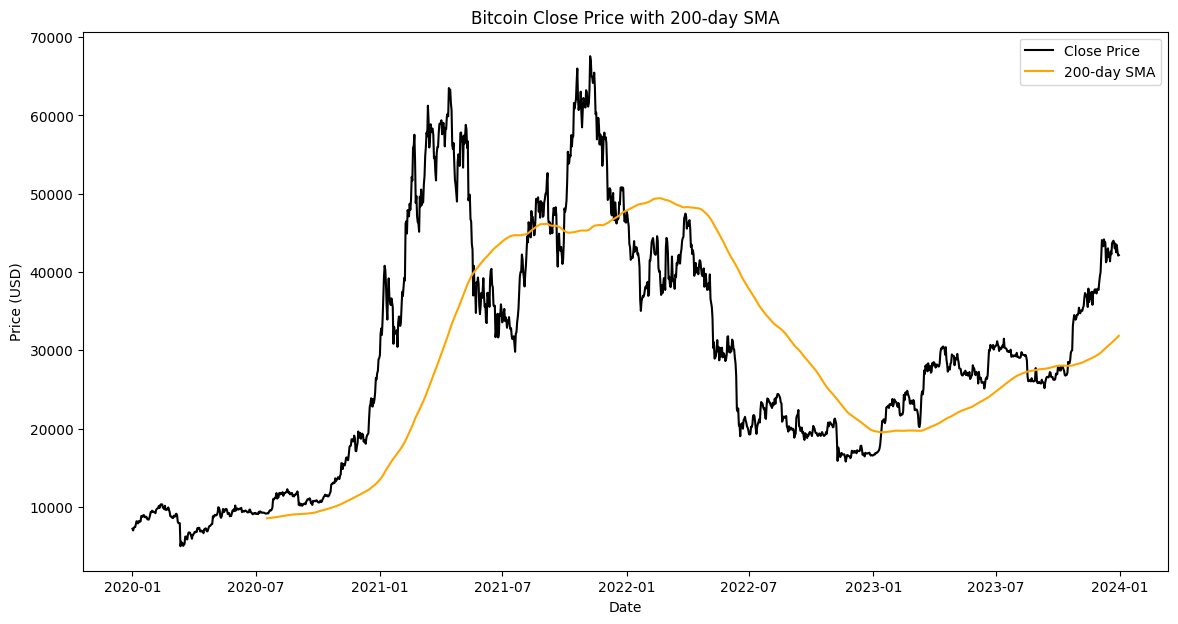

In [3]:
# Calculate 200-day SMA
bitcoin_data['SMA_200'] = bitcoin_data['Close'].rolling(window=200).mean()

# Plot with Close price & 200-day SMA
plt.figure(figsize=(14,7))
plt.plot(bitcoin_data['Close'], label='Close Price', color='black')
plt.plot(bitcoin_data['SMA_200'], label='200-day SMA', color='orange')
plt.title('Bitcoin Close Price with 200-day SMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


## 📈 Calculate Rolling Volatility

Volatility measures how much the price changes over time.
We calculate the 30-day rolling standard deviation of daily returns to see periods when Bitcoin was more or less volatile.


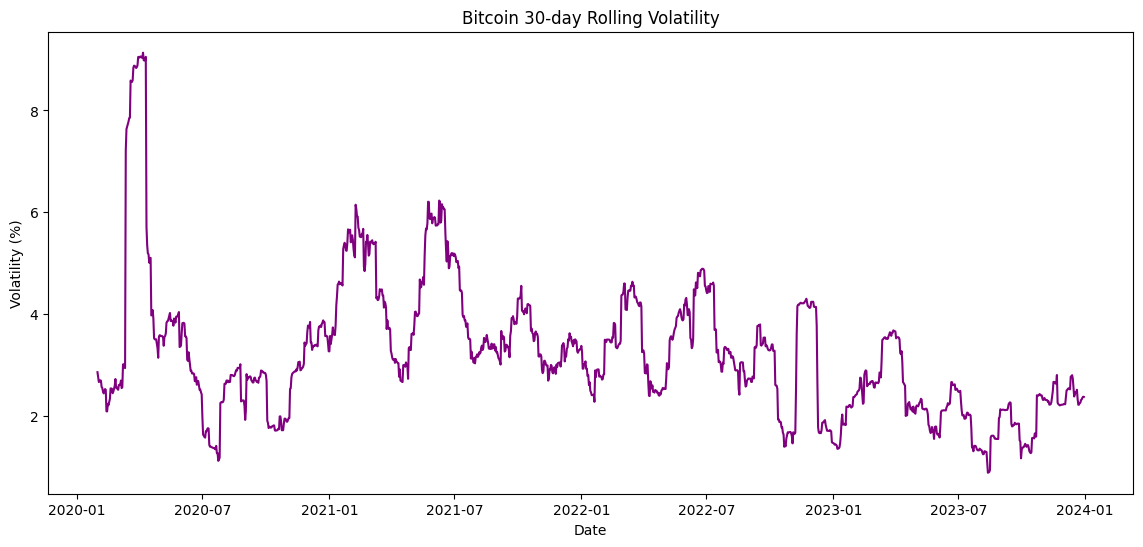

In [4]:
# Calculate daily returns
bitcoin_data['daily_return'] = bitcoin_data['Close'].pct_change()

# Calculate rolling volatility (30-day standard deviation)
bitcoin_data['volatility_30d'] = bitcoin_data['daily_return'].rolling(window=30).std() * 100  # in %

# Plot volatility
plt.figure(figsize=(14,6))
plt.plot(bitcoin_data['volatility_30d'], color='purple')
plt.title('Bitcoin 30-day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.show()


## ⚖ Compare Bitcoin vs Ethereum

Let's see how Bitcoin and Ethereum daily returns move together.
We'll plot them on the same chart and calculate the correlation between their daily returns.


/tmp/ipython-input-5-3067547916.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eth_data = yf.download('ETH-USD', start='2020-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


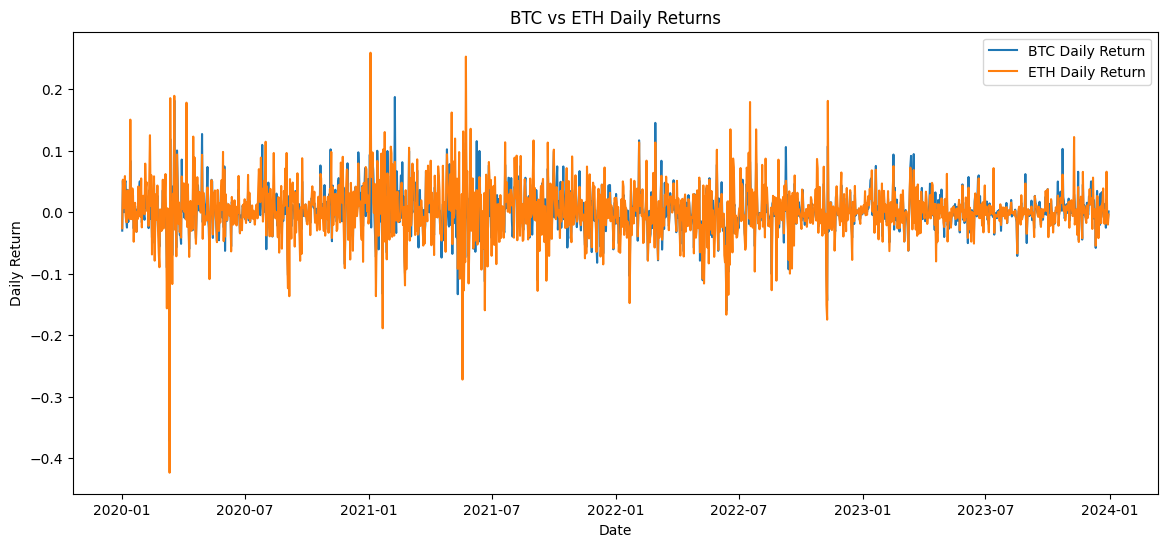

Correlation between BTC and ETH daily returns:
                  btc_daily_return  eth_daily_return
btc_daily_return          1.000000          0.820817
eth_daily_return          0.820817          1.000000


In [5]:
# Download Ethereum data
eth_data = yf.download('ETH-USD', start='2020-01-01', end='2023-12-31')

# Fix multi-index if needed
if isinstance(eth_data.columns, pd.MultiIndex):
    eth_data.columns = eth_data.columns.get_level_values(0)

# Calculate daily returns
bitcoin_data['btc_daily_return'] = bitcoin_data['Close'].pct_change()
eth_data['eth_daily_return'] = eth_data['Close'].pct_change()

# Combine into one dataframe
combined = pd.concat([bitcoin_data['btc_daily_return'], eth_data['eth_daily_return']], axis=1)

# Plot BTC vs ETH daily returns
plt.figure(figsize=(14,6))
plt.plot(combined['btc_daily_return'], label='BTC Daily Return')
plt.plot(combined['eth_daily_return'], label='ETH Daily Return')
plt.title('BTC vs ETH Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

# Correlation
correlation = combined.corr()
print('Correlation between BTC and ETH daily returns:')
print(correlation)


## ✅ Summary

In this notebook, we:
- Explored Bitcoin price data (candlestick chart, close price)
- Added technical indicators (50-day and 200-day SMAs)
- Analyzed rolling volatility
- Compared Bitcoin vs Ethereum returns and correlation

**Next ideas:**
- Add more indicators (Bollinger Bands, RSI)
- Forecast with machine learning models
- Build an interactive dashboard in Power BI or Dash

*This notebook is part of my data analyst portfolio.*
